<a href="https://colab.research.google.com/github/ChiVladimir/pythonProject_2/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9E%D0%B1%D0%B7%D0%BE%D1%80_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%98%D0%98_%D0%94_%D0%97_cvv_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание по теме "Обзор основных направлений ИИ"

Канни Эдж Детектор (Canny Edge Detector) — это один из самых известных и широко используемых алгоритмов для обнаружения границ в изображениях.


###Этапы работы Канни Эдж Детектора

1. **Сглаживание изображения (Noise Reduction)**: Первым шагом является применение гауссового фильтра для снижения шумов в изображении. Это делает границы более четкими.

2. **Градиентное преобразование (Gradient Computation)**: Вычисление градиентов изображения, чтобы определить направление и величину изменений интенсивности. Обычно используются операторы Собеля для этого этапа.

3. **Ненаправленное подавление (Non-Maximum Suppression)**: В этом этапе выделяются только те пиксели, которые являются локальными максимумами вдоль направления градиента. Это помогает избавиться от менее выраженных границ.

4. **Двойной порог (Double Thresholding)**: Установка двух пороговых значений для определения сильных и слабых границ. Пиксели, которые превышают высокий порог, считаются границами, а те, что между двумя порогами, будут проверены на связь с сильными границами.

5. **Связывание границ (Edge Tracking by Hysteresis)**: Связывание слабых границ с сильными для окончательного определения границ. Слабые границы, которые соединяются с сильными, считаются границами.

###Пример реализации Канни Эдж Детектора на Python

Вот пример кода на Python, который использует библиотеку OpenCV для реализации Канни Эдж Детектора:



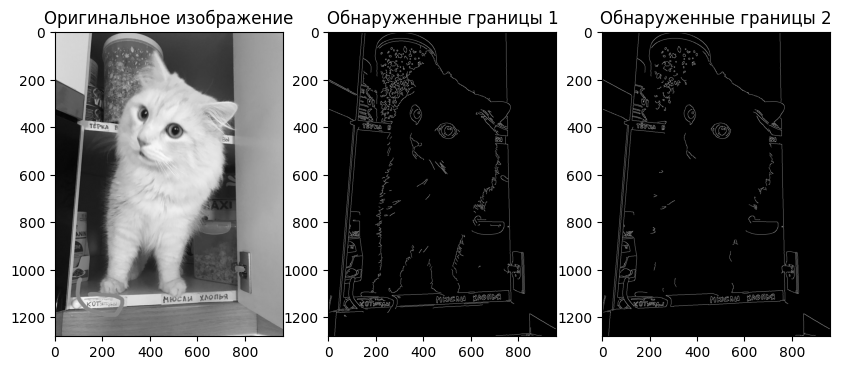

In [15]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/de8b4190-377e-449a-bdb2-52b13f9c088b.jpeg', cv2.IMREAD_GRAYSCALE)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение Канни Эдж Детектора
low_threshold = 50
high_threshold = 100

edges_1 = cv2.Canny(blurred_image, low_threshold, high_threshold)# <- оптимальные пороги для данного изображения - 50, 100

low_threshold = 50
high_threshold = 150

edges_2 = cv2.Canny(blurred_image, low_threshold, high_threshold)
# 50 и 150 - это  high threshold и low threshold —
# два пороговых значения, которые изначально были установлены в примере
# для определения сильных и слабых границ на изображении. Качество границ при этих параметрах - неудовлетворительное

# Отображение результата
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Обнаруженные границы 1')
plt.imshow(edges_1, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Обнаруженные границы 2')
plt.imshow(edges_2, cmap='gray')


plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Домашнее задание

Создайте текстовую ячейку в блокноте и напишите в ней свое понимание ответов на следующие вопросы:

1. **Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?**   

2. **Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?**
   - Поэксперементируйте с примером кода и опишите свои наблюдения.

3. **Используйте Канни Эдж Детектор для различных изображений и сравните результаты. **

4. **Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?**

5. Сохраните свой блокнот, расшарьте его и направьте ссылку на ваш блокнот на проверку преподавателю.

#NB! Не забудьте загрузить в колаб изображения для тестирования (используйте фотографии из своих источников или интернета).
Замените в коде ссылки на изображения, использованные преподавателем, на ваши. Как это сделать - показано в лекции.


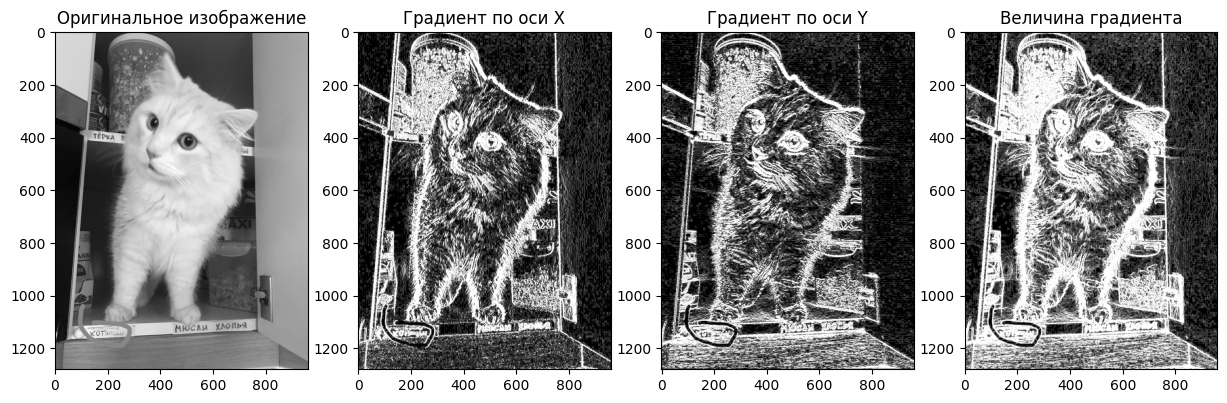

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/de8b4190-377e-449a-bdb2-52b13f9c088b.jpeg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация градиентов для отображения
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


#Детектор краев Canny(Canny Edge Detector)

Одной из ключевых методологий в процессе **идентификации объекта** на статическом изображении (или статическом, полученным из динамического) является обнаружение края объекта. Обнаружение краев включает в себя множество математических методов, в общем направленных на идентификацию краев, определенных как кривые на цифровом изображении, на которых яркость изображения резко меняется или имеет разрывы. При этом общие предположения о неоднородности в разной степени яркости участков изображения исходят из следующих гипотез:



* влияние разрывов по глубине, то есть разница расстояний от объектов, попавших в кадр, до точки съемки, на фотофиксацию;
* влияние неоднородности в ориентации поверхностей объекта в пространстве;
* влияние изменений свойств материалов объектов;
* различия в освещенности объектов, расположения точки (или точек) освещения.

Независимое от точки обзора ребро обычно отражает неотъемлемые свойства трехмерных объектов в двумерном представлении.
По сути задача сводится к оптимальному подбору контрастности монохромного изображения и анализу переходов градиентов серого.

В методе обнаружение краев Canny изображение последовательно проходит следующие стадии обработки:


1.   **Фильтр Гаусса.** Цветное изображение преобразовано до оттенков серого и применен фильтр Гаусса (низкочастотный фильтр, который сглаживает неравномерные значения пикселей изображения, обрезая самые высокие значения. Он основан на использовании функции Гаусса, которая совпадает с функцией плотности вероятности нормального распределения).
Этот шаг позволяет усилить контрастность изображения и подавить все шумы.
В этом же кроится и один из существенных недостатков метода - фильтр Гаусса также сглаживает границы объектов, которые являются высокочастотной характеристикой, что увеличивает вероятность пропуска слабых краев и появления в результате изолированных ребер и разрывов.
Существуют более современные методы анализа, позволяющие достичь высокой точности обнаружения реального края, основанные на гипотезе, что к шуму следует применить более плавный эффект, а к краю следует добавить менее плавный эффект. Для этого разработан адаптивный фильтр, в котором фильтр оценивает разрыв между значениями оттенков серого для каждого пикселя. Чем выше разрыв, тем меньшее значение веса устанавливается для сглаженного фильтра в этой точке. И наоборот, чем меньше разрыв между значениями оттенков серого, тем большее значение веса устанавливается для фильтра.
2.   **Определение градиента интенсивности изображения.** Края изображения могут указывать в разных направлениях, поэтому алгоритм Canny использует четыре фильтра для обнаружения горизонтальных, вертикальных и диагональных краев на размытом изображении. Оператор обнаружения краев возвращает значение для первой производной в горизонтальном направлении (Gx) и вертикальном направлении (Gy). Исходя из этого, можно определить градиент и направление края. Угол направления края округляется до одного из четырех углов, представляющих вертикаль, горизонталь и две диагонали (0°, 45°, 90°, и 135 °). Для направления краев, падающих в каждой цветовой области, будет установлено определенное значение угла.
3. **Установление порога величины градиента или подавление нижней границы отсечения.**
Подавление нижней границы отсечки применяется для поиска мест с наиболее резким изменением значения интенсивности. Алгоритм для каждого пикселя градиентного изображения следующий:

 * Сравнивается интенсивность границ текущего пикселя с интенсивностью границ пикселя в положительном и отрицательном направлениях градиента.
 * Если интенсивность границ текущего пикселя наибольшая по сравнению с другими пикселями в маске с тем же направлением (например, пиксель, направленный в направлении y, будет сравниваться с пикселем выше и ниже него по вертикальной оси), значение будет сохранено. В противном случае значение будет подавлено.

 В более грубых реализациях алгоритм классифицирует направления непрерывного градиента на небольшой набор дискретных направлений, а затем перемещает фильтр 3x3 поверх выходных данных предыдущего шага (то есть силы края и направления градиента). В каждом пикселе он подавляет интенсивность краев центрального пикселя (устанавливая его значение равным 0), если его величина не превышает величину двух соседних пикселей в направлении градиента.

 В более точных реализациях используется линейная интерполяция между двумя соседними пикселями, которые пересекают направление градиента. Например, если угол наклона составляет от 89 ° до 180 °, интерполяция между градиентами в пикселях север и северо-восток даст одно интерполированное значение, а интерполяция между пикселями юг и юго-запад даст другое. Величина градиента в центральном пикселе должна быть больше, чем оба этих параметра, чтобы он был отмечен как ребро.

4. **Двойной порог.** После применения не максимального подавления остаются некоторые граничные пиксели, которые вызваны шумом и изменением цвета. Для учета этих ложных срабатываний важно отфильтровывать граничные пиксели со слабым значением градиента и сохранять граничные пиксели с высоким значением градиента. Это достигается путем выбора высоких и низких пороговых значений. Если значение градиента граничного пикселя превышает высокое пороговое значение, он помечается как пиксель с сильным краем. Если значение градиента граничного пикселя меньше высокого порогового значения и больше нижнего порогового значения, он помечается как слабый граничный пиксель. Если значение градиента граничного пикселя меньше нижнего порогового значения, оно будет подавлено.

5. **Отслеживание краев с помощью гистерезиса.** На этом этапе требуется определить, исходят ли пиксели со слабыми краями от истинного края или от вариаций шума или цвета. Если это так, то их следует исключить из рассмотрения, если это последнее. Этот алгоритм использует идею о том, что пиксели со слабыми краями от истинных краев будут соединены с пикселем с сильными краями, в то время как шумовые отклики не связаны. Для отслеживания граничного соединения применяется анализ больших двоичных объектов путем просмотра пикселя слабой границы и его 8 связанных соседних пикселей. Пока в большом двоичном объекте присутствует один пиксель с сильными краями, эту слабую краевую точку можно идентифицировать как точку, которую следует сохранить. Эти слабые краевые пиксели становятся сильными краями, что затем может привести к последующему сохранению соседних слабых краевых пикселей. Исключенные пиксели подавляются.




**Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?**


  По сути, при использовании данной методы в процессе отладки мы имеем всего два ключевых параметра настройки процесса для оптимизации выходного изображения. Использование двух пороговых значений с гистерезисом обеспечивает некоторую гибкость, но, очевидно, недостаточную, чтобы не пропустить важную информацию. Трудно указать общий порог, который хорошо работает для всех изображений.

  Готового подхода к этой проблеме, как указывают источники, не существует.

  На мой взгляд решением для подбора оптимальных значений порогов будет обработка оригинала искомого изображения до определения опорных точек (с учетом изменения ракурса) и сравнение двух отпечатков с определением коэффициента отклонения. Далее при максимальном значении коэффициента отклонения можно считать примененные пороги оптимальными.

  В примере с котом это может быть, например, в самом элементарном случае связка из трех характерных объектов (глаза + нос). Очевидно, что в общем для вида это даст отличие от собаки или слона. Хотя таких масок должно быть достаточное количество для решения конкретной поставленной задачи - очевидно, что на вопрос "Есть ли на изображении кот?" анализ наличии морды кота не даст точного ответа, если кот сидит спиной.


**Применимость** данной методологии, очевидно, невообразимо широка!

Первое, что приходит на ум - это, в области безопасности, выделение конкретных лиц в толпе. Причем оригинал может быть соответствующим образом хэширован и применение соответствующей методики распознования может детектировать совпадение и "ведение" объекта без конкретизации искомого объекта.

Второе - это контроль процесса производства в машиностроении. Есть образ детали на станке или 3D-принтере. Целесообразно иметь независимый автоматизированный контроль процесса - резец или фреза могут "полететь", программа может дать сбой и "запороть" деталь, для принтера - Bowden-экструдер (устаревшая технология, но применимая) может остановить процесс подачи филамента (начать "скользить" на мелких ходах) или оборвать его между термоголовкой и приводом, хитер может "потечь", если ослабнет соединение термобарьера и сопла, и проч., и проч., и проч. Все указанные коллизии в известной степени могут быть обработаны либо на супер дорогих обрабатывающих центрах, либо вообще не обрабатываться (имеющиеся технические возможности подключения к стойке ЧПУ или Клипперу видео-камер - не в счет). Система распознавания может в онлайне сопоставлять эталонный и фактический процесс изготовления детали. С соответствующей независимой сигнализацией.